# Desafio 2526 Gráficos y Correlación

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

## 1. Importar librerías y .csv

* Importe las librerías básicas para el análisis de datos
* Descarge e importe el archivo nations.csv. warning: va a encontrar un error en el formato

¿Cómo lo podemos solucionar?.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
df = pd.read_csv('nations.csv', encoding='latin-1')

**¿Cómo lo podemos solucionar el error?**

El archivo csv no está encodeado en UTF-8, sino que contiene caracteres en encoding latin-1, por lo tanto hay que
indicar como opción ```encoding='latin-1'```

In [3]:
df.shape

(194, 14)

In [4]:
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


La base de datos contiene información a nivel mundial sobre demografía:

* ```country```: País.
* ```region```: Continente del país.
* ```gdp```: Producto Interno Bruto per cápita, precios 2005.
* ```school```: Promedio años de escolaridad.
* ```adfert```: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
* ```chldmort```: Probabilidad de muerte antes de los 5 años por cada 1000.
* ```life```: Esperanza de vida al nacer.
* ```pop```: Población total.
* ```urban```: Porcentaje de población urbana.
* ```femlab```: Tasa entre hombres y mujeres en el mercado laboral.
* ```literacy```: Tasa de alfabetismo.
* ```co2```: Toneladas de Co2 mitidas per cápita.
* ```gini```: Coeficiente de desigualdad del ingreso.
* Apellidos desde la M hasta la Z: Enfocarse en las variables ```femlab```, ```literacy``` y ```school```.

Apellido: Porras

## 2. Refactor gráficos ```mathplotlib``` a ```seaborn```

A  continuación se  presenta una  serie de  gráficos construídos con matplotlib.  Se  le  piderefactorizarlos utilizando seaborn.

* Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.

## A.)

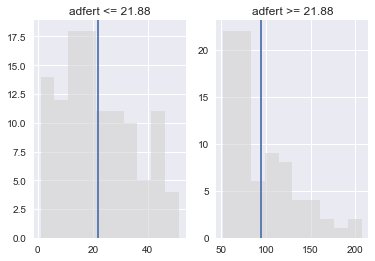

In [5]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    binarize_col = f"binarize_{variable}"
    tmp[binarize_col] = np.where(tmp[variable] > np.mean(tmp[variable]),
                                              1,
                                              0)
    hist_1 = tmp[tmp[binarize_col] == 1][variable].dropna()
    hist_0 = tmp[tmp[binarize_col] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.show()

binarize_histogram(df, 'adfert')
#binarize_histogram(df, 'femlab')
#binarize_histogram(df, 'literacy')
#binarize_histogram(df, 'school')


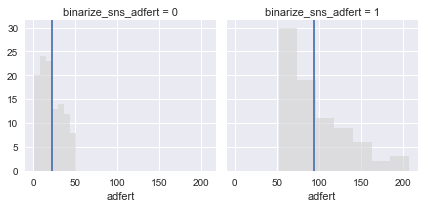

In [6]:
def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), **kwargs)

def binarize_histogram_sns(dataframe, variable):
    tmp = dataframe
    binarize_col = f"binarize_sns_{variable}"
    tmp[binarize_col] = np.where(tmp[variable] > np.mean(tmp[variable]),
                                              1,
                                              0)
    grid = sns.FacetGrid(dataframe, col=binarize_col, col_wrap=2)
    grid = grid.map(sns.distplot, variable, color='lightgray', kde=False, hist_kws={"alpha": 0.6})
    grid = grid.map(vertical_mean_line, variable)

binarize_histogram_sns(df, 'adfert')
#binarize_histogram_sns(df, 'femlab')
#binarize_histogram_sns(df, 'literacy')
#binarize_histogram_sns(df, 'school')


Los gráficos se diferencian porque los rangos de X varían

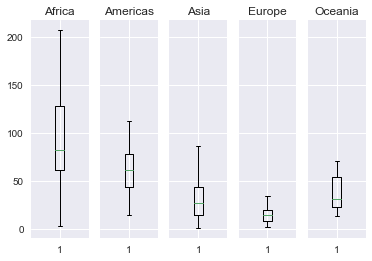

In [7]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) /2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)

grouped_boxplot(df, 'adfert', 'region')

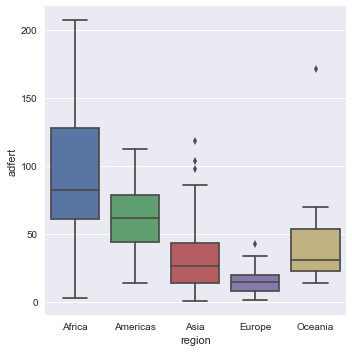

In [8]:
def grouped_boxplot_sns(dataframe, variable, group_by):
    sns.catplot(y=variable, x=group_by, data=dataframe, kind="box")

grouped_boxplot_sns(df, 'adfert', 'region')

## B.)

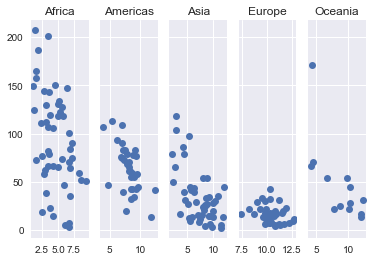

In [9]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
        
grouped_scatterplot(df, 'school', 'adfert', 'region')

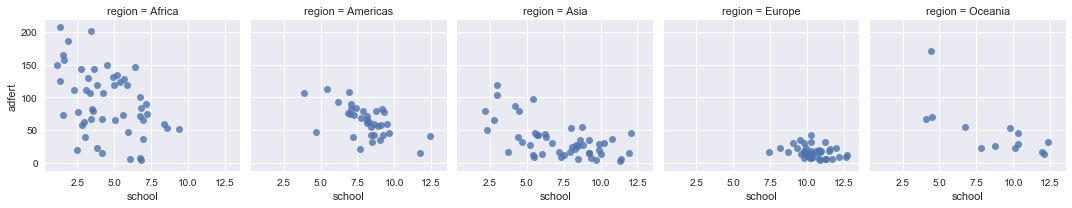

In [10]:
def grouped_scatterplot_sns(dataframe, x, y, group_by):
    sns.lmplot(x=x, y=y, col=group_by, data=dataframe, fit_reg=False, height=3, sharey=True)
    
grouped_scatterplot_sns(df, 'school', 'adfert', 'region')

## 3. Genere un heatmap entre todas las variables

* En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

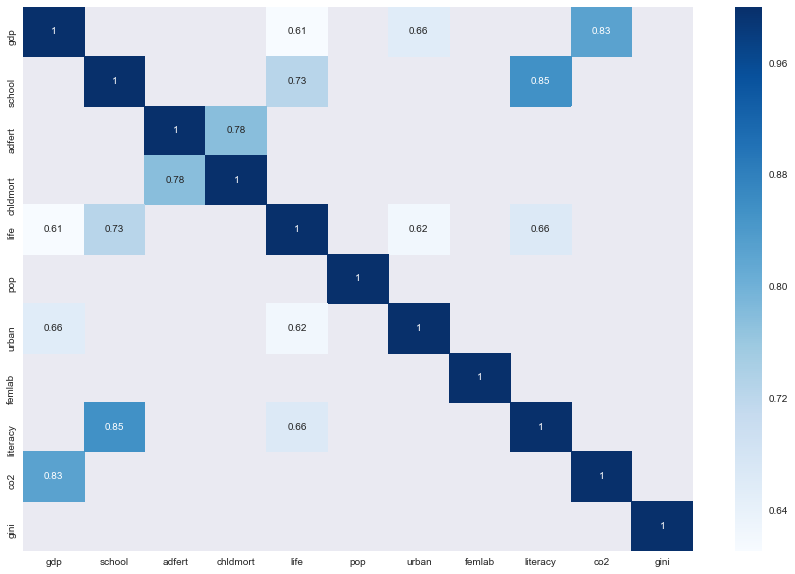

In [11]:
df_sub = df.loc[:,'country':'gini']
corr = df_sub.corr()
corr=corr[corr > 0.6]
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='Blues',annot=True)

### Variables asignadas: ```femlab```, ```literacy``` y ```school```
De este gráfico se puede deducir que:

* ```femlab```: No tiene ninguna correlación significativa con ninguna variable.
* ```literacy```: Tiene una corelación positiva de 0.85 con la variable ```school``` y una correlación de 0.66 con la variable ```life```, lo que indica que es muy probable que exista una relación proporcional entre ```literacy``` con ambas variables.
Quiere decir que la `tasa de alfabetismo` se corresponde directamente con el `promedio de años de escolaridad`y con `la esperanza de vida al nacer`
* ```school```: De la misma forma school tiene una correlacion positiva alta con ```literacy```, pero tambien tiene una correlación positiva alta de 0.73 con la variable ```life```.  Por lo cual se puede decir que es proporcional a ambas.

In [77]:
df_sub = df.loc[:,'country':'gini']
corr = df_sub.corr()
corr=corr[corr < -0.6]
corr

,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
gdp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school,NaN,NaN,-0.675219,-0.772668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adfert,NaN,-0.675219,NaN,NaN,-0.731787,NaN,NaN,NaN,-0.67643,NaN,NaN
chldmort,NaN,-0.772668,NaN,NaN,-0.923563,NaN,NaN,NaN,-0.79007,NaN,NaN
life,NaN,NaN,-0.731787,-0.923563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
femlab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
literacy,NaN,NaN,-0.676430,-0.790070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
co2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


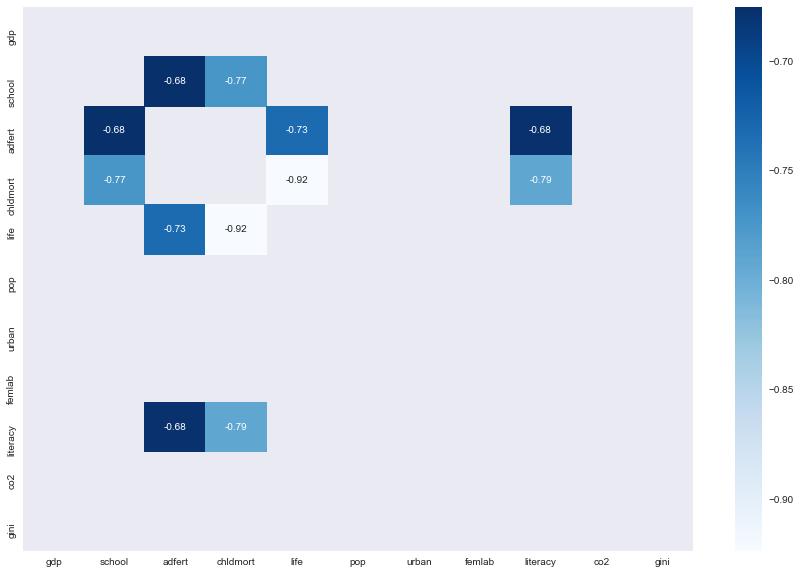

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='Blues',annot=True)

### Variables asignadas: ```femlab```, ```literacy``` y ```school```

De este gráfico se puede deducir que:

* ```femlab```: No tiene ninguna correlación significativa con ninguna variable
* ```literacy```: Tiene una corelación negativa de -0.79 con la variable ```chldmort``` y una correlación negativa de -0.68 con la variable ```adfert```, lo que indica que es muy probable que exista una relación inversamente proporcional entre `literacy` con ambas variables.
* ```school```: Tiene una corelación negativa de -0.77 con la variable ```chldmort``` y una correlación negativa de -0.68 con la variable ```adfert```, lo que indica que es muy probable que exista una relación inversamente proporcional entre ```school``` con ambas variables.

## 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

* tip: Genere una nueva tabla segmentando con la siguiente sintáxis: ```tmp = df.loc[:,['variables', 'a', 'agregar']]```. No olvide agregar la variable region.
* tip: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.

In [96]:
tmp_df = df.loc[:, ['country', 'region', 'literacy', 'chldmort', 'adfert', 'school']]
tmp_df.head()

,country,region,literacy,chldmort,adfert,school
0,Algeria,Africa,72.599998,34.75,7.300000,6.716667
1,Benin,Africa,41.700001,122.75,111.699997,3.100000
2,Botswana,Africa,84.099998,60.25,52.099998,8.600000
3,Burkina Faso,Africa,23.600000,170.50,124.800003,1.300000
4,Burundi,Africa,66.599998,168.50,18.600000,2.483333


In [101]:
regions = tmp_df['region'].unique()
regions

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

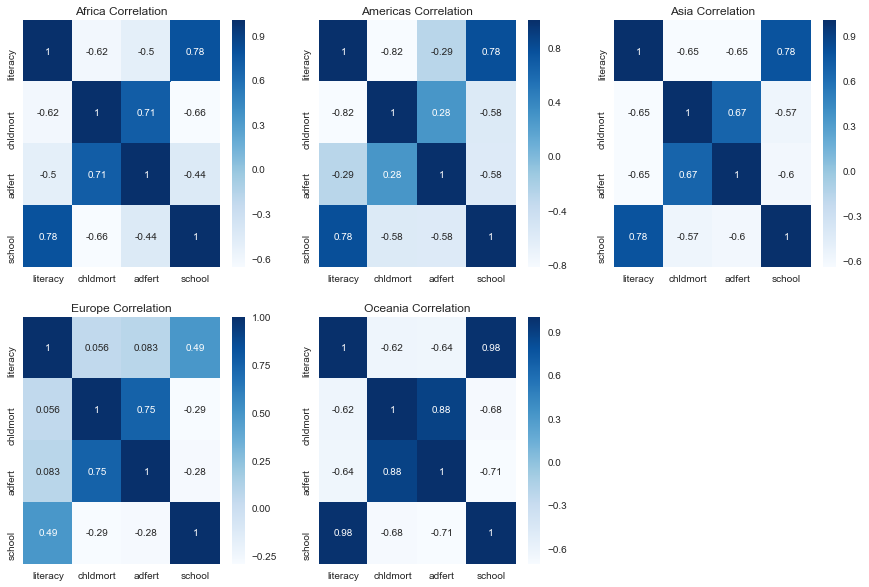

In [124]:
regions = tmp_df['region'].unique()
plt.figure(figsize=(15,10))
for index, region in enumerate(regions):
    region_df = tmp_df[tmp_df['region'] == region]
    plt.subplot((len(list(regions))/3)+1, 3, index + 1)
    plt.title(f"{region} Correlation")
    sns.heatmap(region_df.corr(), cmap='Blues',annot=True)

* Comente brevemente las principales correlaciones a través de las regiones:

#### Variables asignadas: ```femlab```, ```literacy``` y ```school```

* Podemos observar unas correlaciones significativas entre la variable `literacy` y `school`, para las regiones `Africa con (0.78)`, `Americas con (0.78)`, `Asia con (0.78)`, y `Oceania con (0.98)`, estas correlaciones indican una posible relación de proporcionalidad entre ambas variables.  Sin embargo, cuando hicimos la correlación con todos los datos esta no llegaba a ser mayor a 0.6

* Podemos observar que sucede algo parecido a lo descrito anteriormente, entre las variables `literacy` y `chldmort`, estas presentan
correlaciones negativas significativas en las regiones `Africa con (-0.62)`, `Americas con (-0.82)`, `Asia con (-0.65)`
y `Oceania con (-0.64)`, indicando una relación inversamente proporcional entre estas variables.
Sin embargo, para la región `Europe con (0.056)` no se cumple esto.

* Con la variable `literacy` y `adfert` podemos observar que solo en las regiones `Africa con (-0.5)`,
`Asia con (-0.65)` y `Oceania con (-0.64)` presentan correlacion negativa significativa.  Parecida
a la relación del total de los datos.


* Las variables `school` y `adfert` presentan correlaciones negativas significativas para todas las regiones menos Europa.
Un caso similar a `literacy` con `chldmort`

Podemos concluir que la region `Europa` influye mucho en la totalidad de los datos.